# Graph Visualizer For Algorithms using CSV File

In [1]:
# Importing Modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

In [2]:
# Import Data from CSV file
dataset = pd.read_csv(
    './../data/sample_FCFS_SJF_Comparison.csv', 
    sep=r'\s*,\s*', 
    header=0, 
    encoding='ascii', 
    engine='python'
)

print(dataset)


          name  #cases  avgTAT  avgWT  nCS
0  mDRRHA-fcfs       8    27.0    5.5   29
1   mDRRHA-sjf       8    20.0    4.5   20
2  mDRRHA-fcfs      10    27.0    5.5   29
3   mDRRHA-sjf      10    20.0    4.5   20
4  mDRRHA-fcfs       7    27.0    5.5   29
5   mDRRHA-sjf       7    20.0    4.5   20
6  mDRRHA-fcfs       7    27.0    5.5   29
7   mDRRHA-sjf       7    20.0    4.5   20


In [3]:
MDRRHA_SJS_FCFS = 0
ALGO_COMPARISONS = 1

In [22]:
print(dataset['avgTAT'])

0    27.0
1    20.0
2    27.0
3    20.0
4    27.0
5    20.0
6    27.0
7    20.0
Name: avgTAT, dtype: float64


<Figure size 432x288 with 0 Axes>

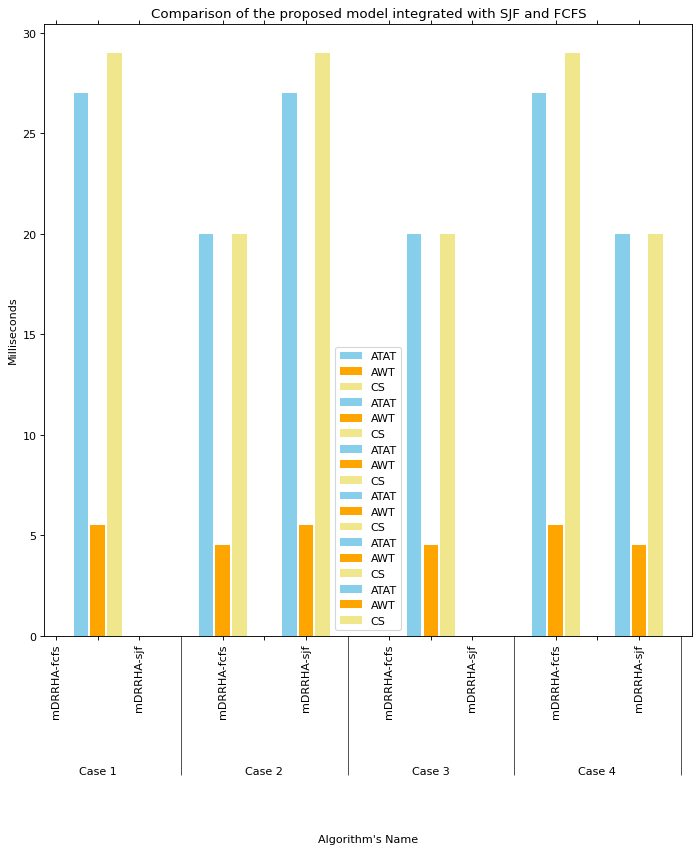

In [56]:
# Comparison of mDRRHA with SJF and FCFS

# Graph Configurations 
plt.figure(MDRRHA_SJS_FCFS)
fig = plt.figure(figsize = (9, 9), dpi = 80)
ax = fig.add_axes([.05, .1, .9, .85])

X = dataset['name'].to_numpy()
X_labels = []
X_axis = []
X_axis_lines = [0]

current_case_index = 1
push_empty = False

counter = 1
for i in range(len(X)):
    X_labels = np.append(X_labels, X[i])
    X_axis.append(counter)

    counter += 1
    if push_empty:
        push_empty = False
        X_axis_lines.append(counter)
        counter += 1

    if i % 2 == 0:
        X_labels = np.append(X_labels, 'Case ' + str(current_case_index))
        current_case_index += 1
        X_axis.append(counter)
        counter += 1
        push_empty = True

ax.set_xticks(X_axis)
ax.set_xticks(X_axis_lines, minor = True)
ax.set_xticklabels(X_labels)

# vertical alignment of xtick labels
minor_axis_padding_up = -0.2
vertical_align = []
for i in range(0, len(X_labels)):
    valueToPush = 0
    if i % 3 == 1:
        valueToPush = minor_axis_padding_up      

    vertical_align.append(valueToPush)

# Adding Lines to xTicks
line_width = 0.025
line_height = 125

for i, (t, y) in enumerate(zip(ax.get_xticklabels(), vertical_align)):
    if i % 3 == 0 or i % 3 == 2:
        t.set_rotation(90)

    t.set_y(y)


ax.tick_params( axis='x', which='minor', direction='out', length=line_height )
ax.tick_params( axis='x', which='major', bottom='off', top='off' )

# plt.bar(X_axis - bar_width - 0.025, dataset['avgTAT'],bar_width, label = 'ATAT')
# plt.bar(X_axis, dataset['avgWT'],bar_width, label = 'AWT')
# plt.bar(X_axis + bar_width + 0.025, dataset['nCS'],bar_width, label = 'CS')

bar_width = 0.35
padding_betweenbars = 0.05

# Plotting Bars
current_bar_index = 0
for index, x_axis in enumerate(X_axis):
    if index % 2 == 1:
        ax.bar(
            x_axis - bar_width - padding_betweenbars, 
            dataset['avgTAT'][current_bar_index], 
            bar_width, 
            label = 'ATAT',
            color = 'skyblue'
        )

        ax.bar(
            x_axis, 
            dataset['avgWT'][current_bar_index], 
            bar_width, 
            label = 'AWT',
            color = 'orange'
        )

        ax.bar(
            x_axis + bar_width + padding_betweenbars, 
            dataset['nCS'][current_bar_index], 
            bar_width, 
            label = 'CS',
            color = 'khaki'
        )

        current_bar_index += 1

plt.xlabel('Algorithm\'s Name', labelpad = 50)
plt.ylabel('Milliseconds')
plt.title('Comparison of the proposed model integrated with SJF and FCFS')
plt.legend()
plt.show()


# TODO: Change Legend Position
# https://stackoverflow.com/questions/4700614/how-to-put-the-legend-out-of-the-plot

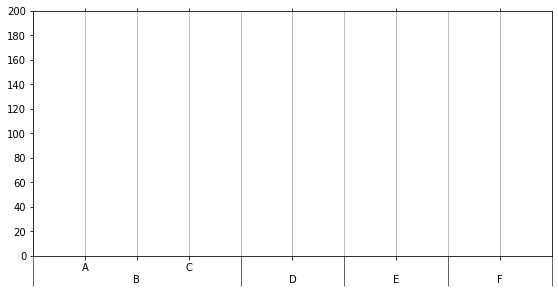

In [69]:
fig = plt.figure( figsize=(8, 4 ) )
ax = fig.add_axes( [.05, .1, .9, .85 ] )
ax.set_yticks( np.linspace(0, 200, 11 ) )

xticks = [ 2, 3, 4, 6, 8, 10 ]
xticks_minor = [ 1, 5, 7, 9, 11 ]
xlbls = [ 'A', 'B', 'C', 'D', 'E', 'F' ]

ax.set_xticks( xticks )
ax.set_xticks( xticks_minor, minor=True )
ax.set_xticklabels( xlbls )
ax.set_xlim( 1, 11 )

ax.grid( 'off', axis='x' )
ax.grid( 'off', axis='x', which='minor' )

# vertical alignment of xtick labels
va = [ 0, -.05, 0, -.05, -.05, -.05 ]
for t, y in zip( ax.get_xticklabels( ), va ):
    t.set_y( y )

ax.tick_params( axis='x', which='minor', direction='out', length=30 )
ax.tick_params( axis='x', which='major', bottom='off', top='off' )